In [1]:
# https://github.com/crmaximo/VAEGAN/blob/master/VAEGAN.py
# SETUP
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot

from keras.models import model_from_json
from tensorflow.keras.models import load_model

# To use COLAB
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    #tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

2022-07-29 12:24:58.985010: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-29 12:24:58.985034: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Note: not using Google CoLab


In [2]:
# Load json 
json_file           = open('decoder.json', 'r')
loaded_decoder_json = json_file.read()
json_file.close()
# Create model
loaded_decoder      = model_from_json(loaded_decoder_json)
# Load weights into new model
loaded_decoder.load_weights("decoder.h5")

# Load trained pix2pix
model = load_model('model_012000.h5')

2022-07-29 12:25:00.841029: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-29 12:25:00.841049: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-29 12:25:00.841069: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Parula): /proc/driver/nvidia/version does not exist
2022-07-29 12:25:00.841232: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-29 12:25:01.282950: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 16777216 exceeds 10%

1/1 [==============================] - 0s 461ms/step


(-0.5, 255.5, 255.5, -0.5)

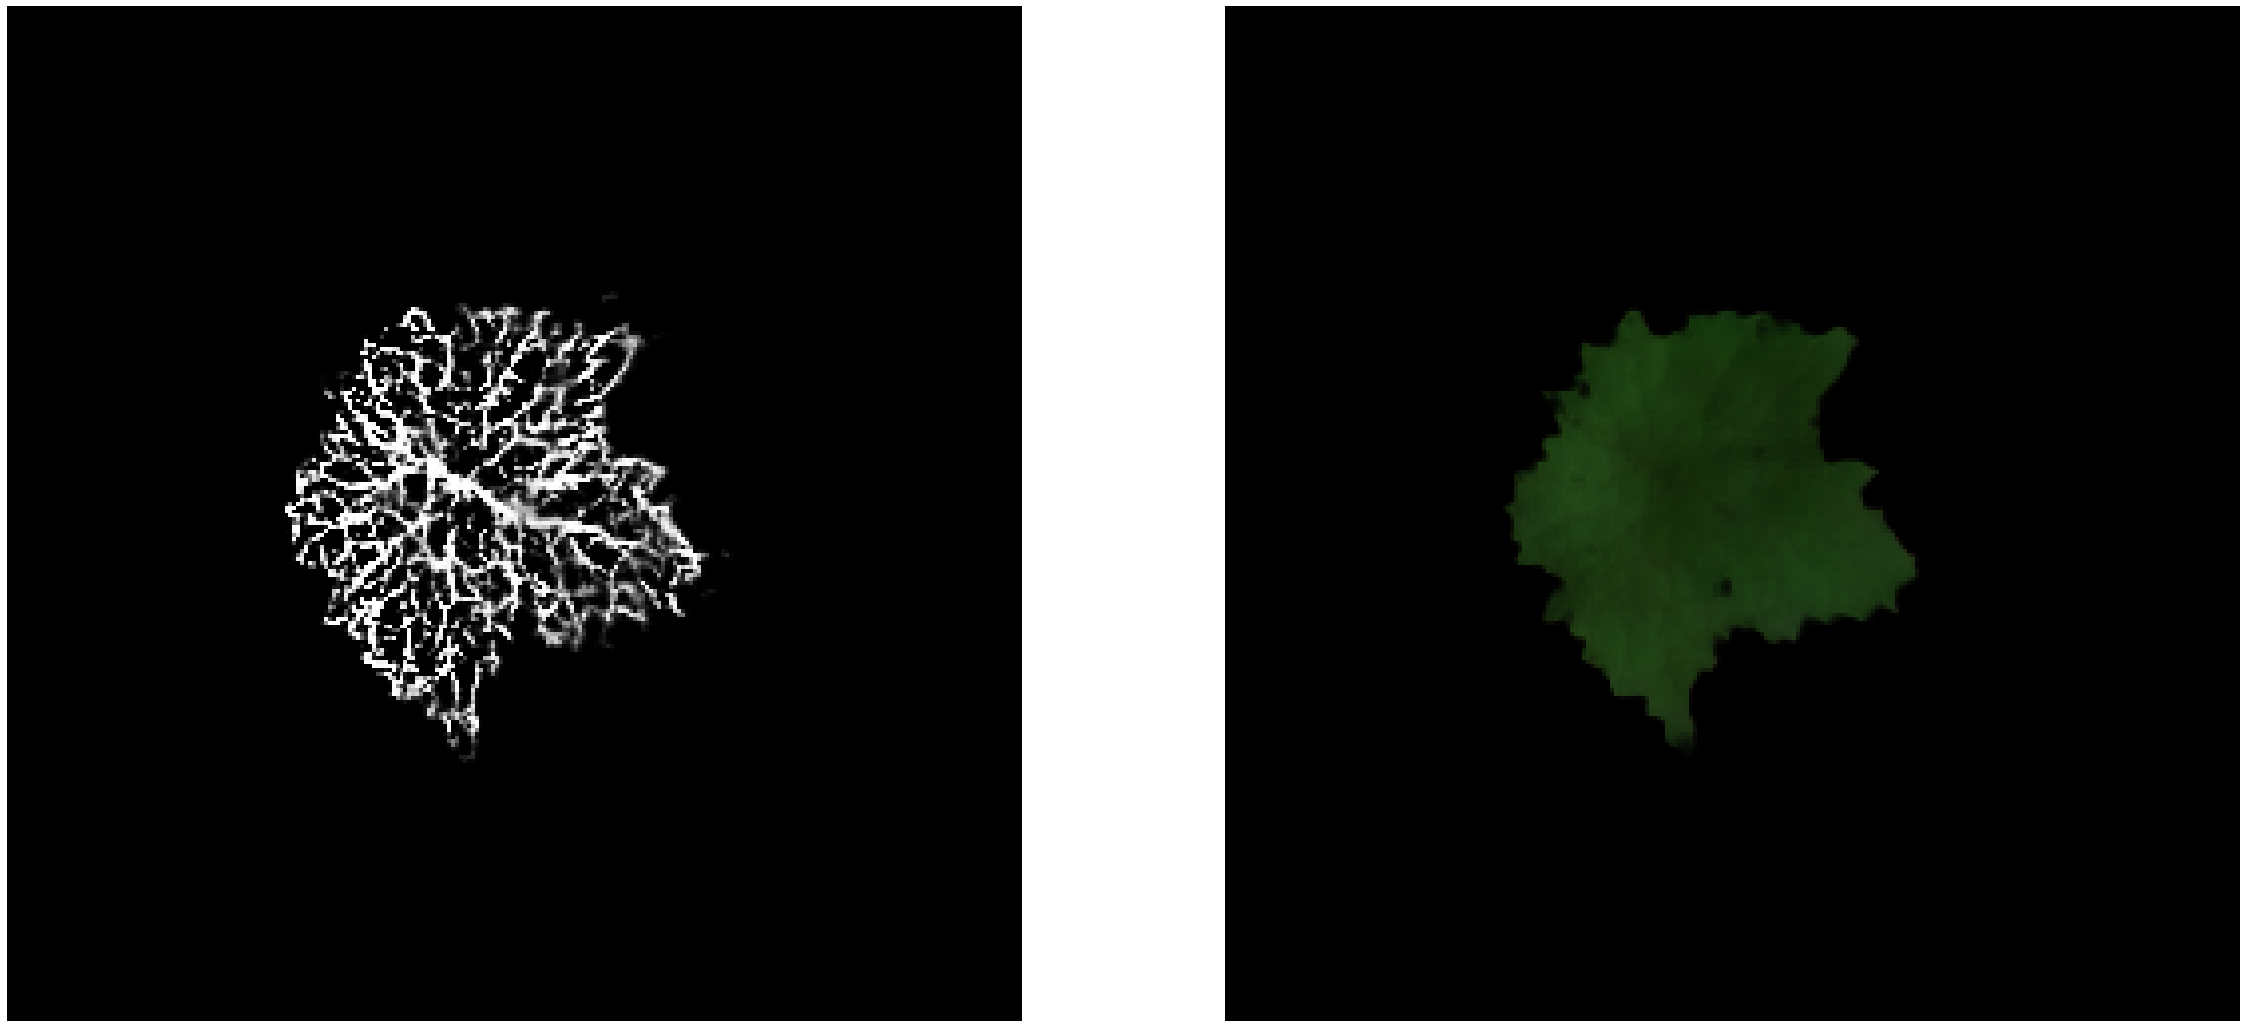

In [3]:
# Generate the leaf's skeleton
latent_dim = 32
to_build = tf.random.normal(shape = [1, latent_dim])
mask_generated = loaded_decoder.predict(to_build)

# Show the generated skeleton
fig, ax = pyplot.subplots(1,2, figsize=(40, 40))
ax[0].imshow(mask_generated.squeeze(), cmap="Greys_r")
ax[0].axis('off')

# Generate the leaf
mask_generated = ( mask_generated - 0.5 ) / 0.5
gen_image = model.predict(mask_generated)
# scale from [-1,1] to [0,1]
gen_image = (gen_image + 1) / 2.0

# Show the generated leaf
ax[1].imshow(gen_image[0])
ax[1].axis('off')

